# 1. Overview

Columns:

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk ‚Äî 0.63)¬≤, where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

Î≤îÏ£Ñ: ÎèÑÏãúÎ≥Ñ 1Ïù∏Îãπ Î≤îÏ£ÑÏú® ZN: 25,000ÌèâÎ∞©ÌîºÌä∏ Ïù¥ÏÉÅÏùò Î∂ÄÏßÄÎ°ú Íµ¨ÌöçÎêú Ï£ºÍ±∞Ïö© ÌÜ†ÏßÄÏùò ÎπÑÏú® INDUS: ÎèÑÏãúÎãπ ÎπÑÏÜåÎß§ÏóÖ ÏóêÏù¥Ïª§ ÎπÑÏú® CHAS : Charles River ÎçîÎØ∏ Î≥ÄÏàò(Í≤ΩÍ≥ÑÍ∞Ä Í∞ïÏù∏ Í≤ΩÏö∞ 1, Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ 0) NOX: ÏÇ∞ÌôîÏßàÏÜå ÎÜçÎèÑ(1Ï≤úÎßåÎ∂ÑÏùò 1) RM: Ï£ºÌÉùÎãπ ÌèâÍ∑† Î∞© Ïàò ÎÇòÏù¥: 1940ÎÖÑ Ïù¥Ï†ÑÏóê Í±¥Ï∂ïÎêú ÏÜåÏú†Ï£ºÍ∞Ä Ï∞®ÏßÄÌïòÎäî ÎπÑÏú® DIS: Î≥¥Ïä§ÌÑ¥ Í≥†Ïö© ÏÑºÌÑ∞ 5Í≥≥ÍπåÏßÄÏùò Í∞ÄÏ§ë Í±∞Î¶¨ RAD: Î∞©ÏÇ¨Ìòï Í≥†ÏÜçÎèÑÎ°ú Ï†ëÍ∑ºÏÑ± ÏßÄÏàò PTRATIO: ÎèÑÏãúÎ≥Ñ ÌïôÏÉù-ÍµêÏÇ¨ ÎπÑÏú® B: 1000(Bk ‚Äî 0.63)¬≤, Ïó¨Í∏∞ÏÑú BkÎäî ÎèÑÏãúÎ≥Ñ [ÏïÑÌîÑÎ¶¨Ïπ¥Í≥Ñ ÎØ∏Íµ≠Ïù∏ ÌòàÌÜµ]Ïùò ÎπÑÏú®ÏûÖÎãàÎã§. LSTAT: Ïù∏Íµ¨Ïùò ÎÇÆÏùÄ ÏßÄÏúÑÏùò ÎπÑÏú® MEDV: $1000 Îã®ÏúÑÏùò ÏÜåÏú†ÏûêÍ∞Ä Í±∞Ï£ºÌïòÎäî Ï£ºÌÉùÏùò Ï§ëÍ∞Ñ Í∞ÄÏπò

# 2. Importing Libraries and Reading the Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML

sns.set_style('darkgrid')

C:\Users\user\AppData\Local\Temp\ipykernel_10812\1477702349.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

C:\Users\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [64]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

As you seen, there isn't "MEDV" column that we will try to predict. Let's add the column to our dataset.

In [65]:
dataset['MEDV'] = boston_dataset.target

In [66]:
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# 3. Data Analysis
## Data Preprocessing
Are there missing values? There isn't any missing values as shown below.

In [67]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [68]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [70]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


# Visualizing Data

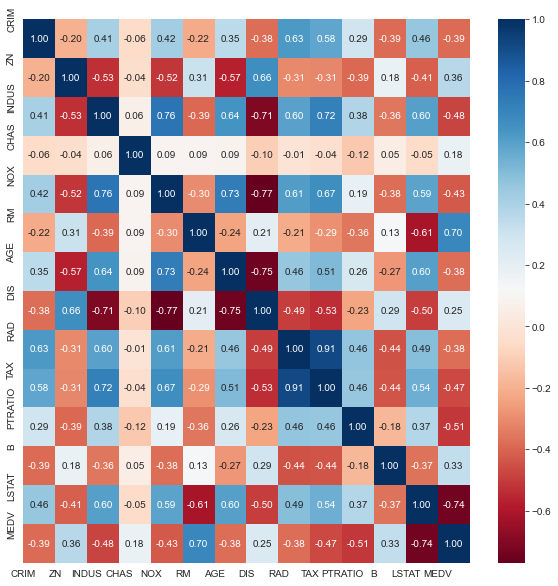

In [71]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

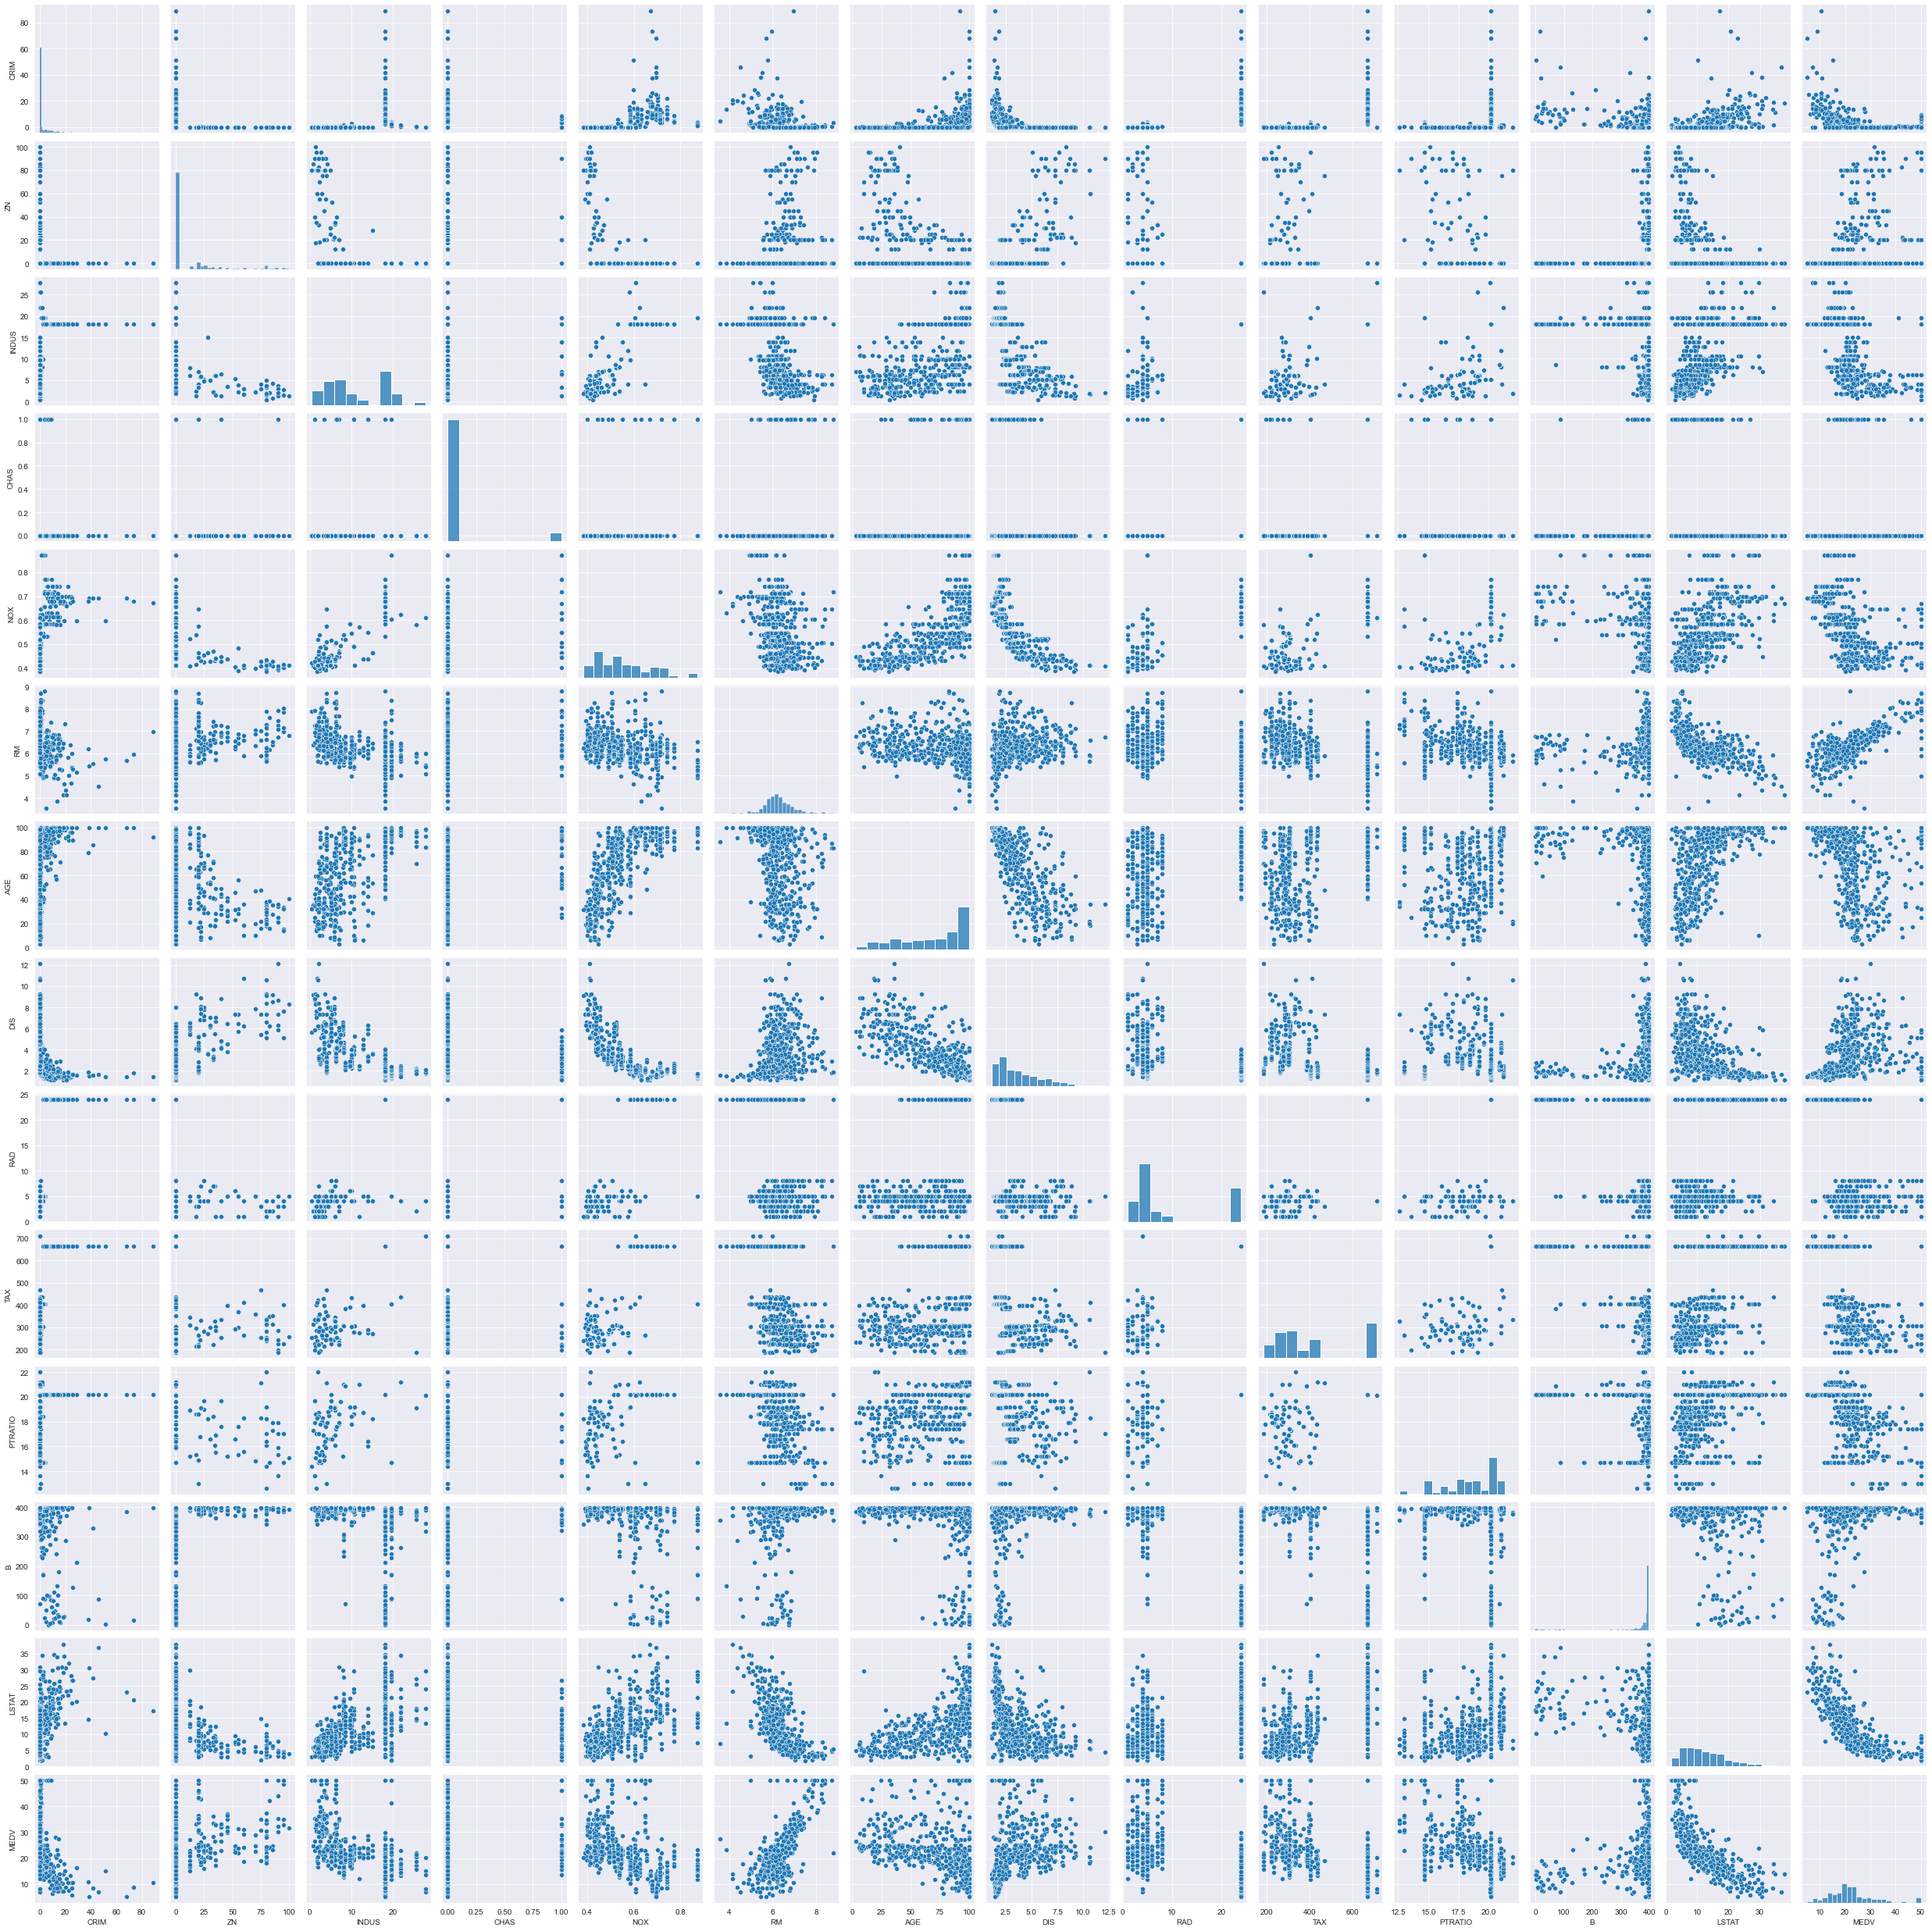

In [72]:
sns.pairplot(dataset)
plt.show()

# 4. Regression Models
## Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [74]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.698485447615603
R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710362
RMSE:  4.647279745724203


## Polynomial Regression - 2nd degree

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [76]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.698485447615603
R2_score (train):  0.9274207682967779
R2_score (test):  0.710456746436502
RMSE:  4.670750154877703


## Ridge Regression

In [77]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [78]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7635629962138705
R2_score (train):  0.9228176586388412
R2_score (test):  0.891965455298589
RMSE:  2.853062166443757


## Lasso Regression

In [79]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [80]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7505443182491558
R2_score (train):  0.9234017201921203
R2_score (test):  0.8950938075525039
RMSE:  2.8114507112289013


## Support Vector Regression

In [81]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [82]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [83]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.36987319e+00 -4.55439586e-01 -8.92847675e-01 -4.21808286e-01
  9.64245397e-01  9.71901202e-02  1.78213456e-03 -1.90259521e-01
 -1.42857576e-02  4.31828224e-01 -6.32672337e-01 -1.55751282e-01
 -3.64179956e-01 -4.65032516e-01  1.36742269e+00 -9.51898388e-01
  1.43308437e-02 -7.34034686e-02  1.44105157e-01 -4.34885990e-02
  7.96878507e-01 -6.43945914e-01  7.55762915e-01  4.49438702e-01
 -4.11325844e-01 -7.04648004e-01  2.65992879e+00 -4.36423978e-01
 -3.52311170e-01 -4.92310702e-01 -1.05553362e+00 -3.08842955e-01
 -8.29645505e-01 -7.87166019e-01  2.18351468e-01 -1.85212392e-01
 -5.63773540e-01  2.61456725e+00  1.32005653e+00  5.47329158e-01
 -1.23025356e+00  2.04488559e+00  2.61130150e+00 -4.30786161e-01
 -1.00299613e+00 -1.66660446e+00 -1.13856989e+00 -6.68613420e-01
  2.18210690e-01  1.98938910e+00 -1.08482044e-01  1.02534512e-01
 -8.32338789e-02  2.00548930e-01 -3.24208322e-01  1.70305312e-01
 -6.18044680e-01 -9.62178730e-01 -2.33679580e-02  2.78855815e+00
 -1.51640297e-01 -7.37435459e-01  8.86551917e-03  1.31635319e+00
 -1.97378550e-01 -1.29700914e+00  2.02815518e-01  2.89593335e-01
 -1.92628670e-01 -4.73342876e-01 -1.55881906e+00  2.67905336e-02
 -1.28598961e-01  5.18636974e-01  1.26568189e+00  1.31698694e+00
 -1.14311259e+00 -1.12032578e-01 -1.08917596e-01  9.04937315e-01
  3.14017843e-03 -3.57710133e-01  1.16193190e-01 -1.94648807e-01
 -1.36923595e+00 -8.30457711e-01  2.38579475e+00  1.37415556e+00
 -8.52455975e-01  2.18255110e-01 -5.98706263e-01 -1.36672681e+00
 -7.17530226e-01 -6.83678221e-01  1.73215624e+00  2.24400123e+00
  6.40994704e-01  3.92741615e-01 -5.71842880e-01 -9.35898389e-01
  1.06673962e+00 -8.88142072e-01 -1.60880441e+00 -1.29979043e+00
 -3.25587684e-01 -3.46537980e-01 -1.19076973e+00  5.27252242e-01
  2.19696669e+00 -3.40135502e-01 -5.34708110e-01 -8.58888985e-01
  5.14597516e-02 -1.08110077e-01 -6.65886386e-01 -2.79790354e-01
 -5.99641571e-01  3.76726891e-02  2.71965109e-01 -5.90076439e-01
  2.00707572e+00  2.54849080e-01 -5.42147593e-03  2.98084356e-01
 -1.38038729e+00  2.16321852e-01  1.41423960e-01 -4.78483571e-01
 -2.72164982e-01  8.02160393e-02 -1.59917443e+00  5.70636444e-02
  4.25199043e-01 -2.26493817e-01  2.29594305e+00 -1.16628974e+00
 -1.35441139e+00 -8.77938049e-01  2.24039248e-01 -5.77142528e-01
 -1.36664185e+00 -1.06218813e+00  4.83976045e-01 -8.87329414e-01
  8.54970464e-01  3.63910830e-01 -1.19075140e+00 -4.60116583e-02
 -1.10147468e+00 -8.98671645e-01 -5.12384448e-01 -3.96791602e-01
 -1.32464320e-01 -7.56919768e-01 -1.42225199e-01  5.65895123e-01
  1.13472968e+00  7.39932027e-01 -4.38734536e-01  1.19014737e+00
 -3.32965111e-01 -7.36460340e-01  1.30360400e+00 -3.22104172e-01
 -1.73094578e-01 -2.39582359e-01  1.36446588e+00  1.31931984e+00
 -6.56272636e-01  4.69532233e-01 -8.96180492e-01 -9.85626027e-02
  4.77474378e-01 -1.44819131e-01 -1.86656091e-01  1.01894775e+00
  1.35196350e-01  1.88681886e-01  8.87606465e-01 -1.44695947e+00
 -3.41775539e-01 -1.33035986e-02 -1.72238121e+00 -2.70090931e-01
 -1.99099223e-02 -9.71595827e-01 -3.85759790e-01 -7.10341455e-01
 -8.24321401e-01  9.37487229e-01  1.93480991e+00 -4.01234075e-02
  1.09545595e-01 -2.19409769e-01  2.06704711e+00 -2.61720400e-01
 -5.47553977e-01 -1.16630139e+00 -2.69409435e-01  7.30857051e-02
 -4.92150504e-01 -3.03112671e-01  5.17984253e-03 -7.75423417e-02
  1.43774263e+00  9.99298046e-01 -3.44636176e-01  6.10028792e-01
  1.25302348e+00  2.11121676e-01 -8.56229603e-01 -4.24587030e-01
  4.48375648e-01  6.00257487e-01 -1.33990115e+00 -2.09428936e-01
  1.20397618e-01  1.22172838e+00 -2.30706968e-01 -5.27163356e-02
  4.45906267e-01  1.26357845e+00 -2.15900093e-01 -1.21808663e+00
  6.02157385e-01 -1.21894174e-01  1.02732359e+00  2.93258764e-01
 -2.49630339e-01  5.29075783e-01 -4.83720193e-01  2.06856403e+00
  1.26315545e+00  3.23235292e-01 -8.01670190e-01  9.91184499e-02
 -8.14406810e-01 -1.53557061e-01 -6.81832939e-02 -6.75960202e-01
 -1.13829978e+00 -2.77131627e-01  1.84225931e-02 -6.00394698e-01
  2.67582303e-01  1.57104120e-01 -6.71398791e-01 -7.50127099e-01
 -9.00406244e-02 -1.40932946e+00  6.36362352e-02  1.08083145e-01
 -8.16471147e-01 -1.48235410e-01  9.01500223e-01  3.70413745e-02
  3.07759540e-01 -9.36511789e-01  6.03665522e-01  6.06274384e-01
 -8.15203498e-02 -8.83961968e-01 -2.09699977e-01 -4.96155111e-02
 -8.06072206e-02 -1.50579103e-01  1.31190716e-02 -9.05063080e-01
  8.48127169e-01  1.96787470e-01  1.47621019e-01 -1.22256634e-02
 -1.59174487e-01  5.39750381e-01 -2.22027325e-01 -1.28155317e+00
  3.03169700e-01  9.28694186e-01 -1.87665763e-01 -2.09557315e-01
 -2.56339026e-01  1.36801153e+00 -3.48738033e-01 -5.55581803e-01
 -5.09870505e-01 -8.86078106e-01 -3.37997346e-01  1.41967021e-02
  2.72420875e-02  1.83192351e-01 -1.72398000e-02  1.00690717e+00
  2.83780075e+00 -6.86343596e-01  8.59203887e-01  1.78263754e+00
 -2.82530200e-01 -7.34764597e-02  2.07060672e+00  4.54919658e-01
  4.39951960e-02  1.43596104e-01 -1.36593572e+00 -3.66561124e-01
  6.65362078e-01  2.38819298e-01 -9.31458277e-01 -9.25170569e-01
  1.55138957e-01 -6.87518866e-01 -5.60133108e-01  1.21894194e+00
 -5.50059362e-01 -8.67025720e-01  3.69440010e-01 -3.73837175e-01
 -2.06890833e-01 -3.64524060e-01 -2.96135013e-01 -4.39079889e-01
 -7.56579477e-01  5.81029638e-02 -5.14780173e-01  1.46584607e+00
 -1.10650805e+00 -1.03757306e+00  2.81713168e+00 -3.27855762e-01
  3.91721432e-01 -2.54959899e-01 -3.63458643e-02 -1.14365105e+00
  5.92414429e-01  8.99751139e-01 -4.06935971e-02 -7.81631557e-01
 -4.41425890e-01 -1.41393156e+00 -3.43871337e-02 -3.75627811e-01
 -1.36648551e+00 -9.00306884e-01 -6.57799872e-01  1.86144821e+00
 -1.05097129e+00 -1.15154088e+00 -4.56817602e-01 -3.20108411e-01
 -1.03538357e+00 -4.37679803e-01 -7.81601911e-01 -5.44849768e-01
  6.81538108e-02 -2.51933815e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Decision Tree Regression

In [30]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.6101009802534296
R2_score (train):  1.0
R2_score (test):  0.6228832952155405
RMSE:  5.33049814992143


## Random Forest Regression

In [32]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [33]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8173745857806388
R2_score (train):  0.9767081314867266
R2_score (test):  0.8623835353313546
RMSE:  3.2200684975551876


# 5. Measuring the Error

In [34]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

NameError: name 'rmse_svr' is not defined

In [39]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

NameError: name 'models' is not defined

## Visualizing Model Performance

NameError: name 'predict' is not defined

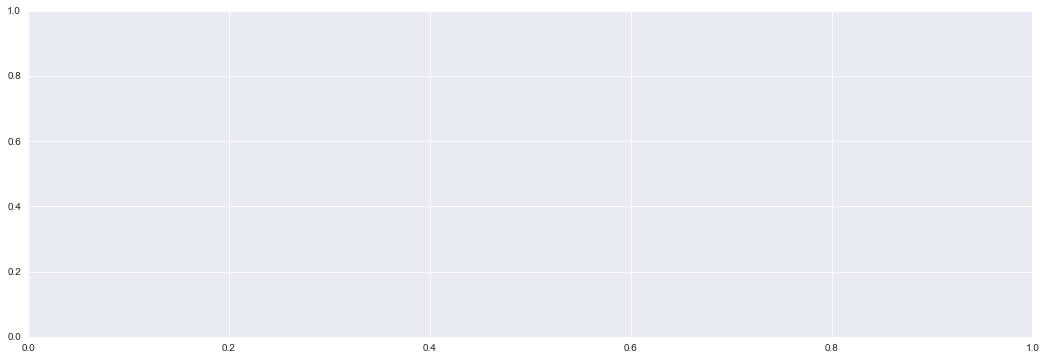

In [38]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

NameError: name 'predict' is not defined

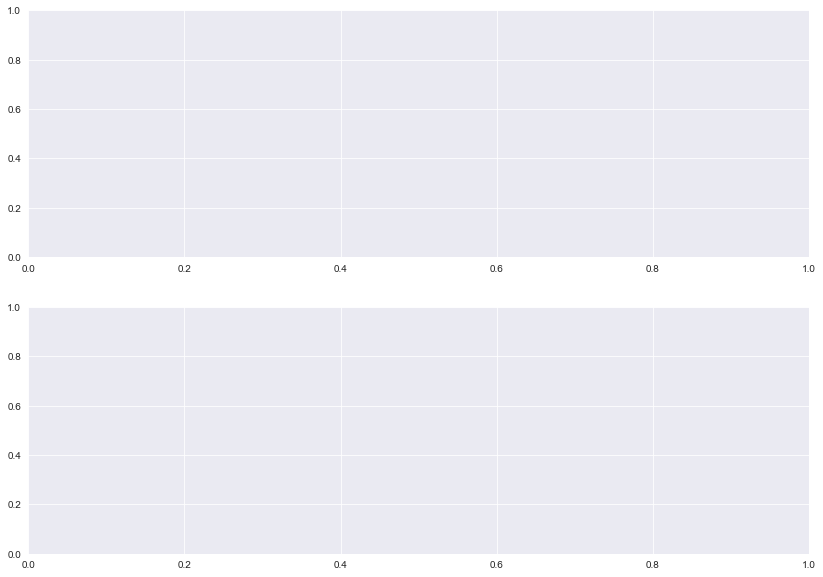

In [40]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

In [41]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

NameError: name 'predict' is not defined

# 6. Conclusion

In this kernel, I have built 7 regression models using Boston Housing Dataset. These are linear, polynomial, ridge, lasso, svr, decision tree and random forest regression. Then measured and visualized the performance of the models. Please make a comment and let me know how to improve model performance, visualization or something in this kernel. This will also help me on my future analysis.

Don't forget to UPVOTE if you liked this kernel, thank you. üôÇüëç